[View in Colaboratory](https://colab.research.google.com/github/Priyankk18k/Boston-House-price-prediction/blob/master/Boston_House_price_prediction.ipynb)

## PROJECT -2 



##                                         Predicting Boston Housing Prices

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
# pretty display for notebooks
%matplotlib inline 
# Loading the housing DAtaset
data=pd.read_csv('https://raw.githubusercontent.com/jessicayung/machine-learning-nd/master/p1-boston-housing/housing.csv')
prices=data['MEDV']
features=data.drop('MEDV',axis=1)
print( "Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


 We will need to separate the dataset into **features** and the **target** variable. The features, **'RM', 'LSTAT', and 'PTRATIO**', give us quantitative information about each data point. The target variable,** 'MEDV'**, will be the variable we seek to predict. **These are stored in features and prices, respectively.**

In [2]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Calculating basic statistic

In [3]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


Or we can do this by Describe function and we have to see only MEDV column because we have previously assigned  prices=data['MEDV']

In [4]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


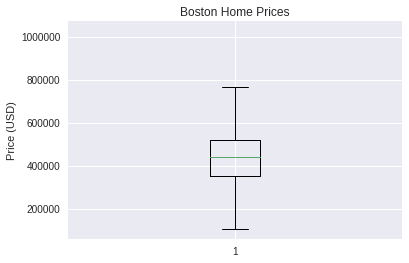

In [5]:
# Boxplot of prices to get a sense of the data

import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Boston Home Prices")
plt.ylabel("Price (USD)")
plt.boxplot(prices)
plt.show()


## Performance Metric
The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

In [0]:
from sklearn.metrics import r2_score
def performance_metric(y_true,y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  score=r2_score(y_true,y_predict)
  return score


##Coefficient of determination of a sample data

In [7]:
# Calculating the performance of the sample model
score=performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Sample Model has a coefficient of determination, R^2, of {:.3f}.").format(score)


Sample Model has a coefficient of determination, R^2, of 0.923.


So now we will consider this model because :

1-The model has a high** R^2 of 0.923**. This means a** 92.3%** percentage of the target variable can be explained by the features using the model. So the model is pretty good.

2-The model also got the ordering of all five datapoints in the dataset correct.

## Shuffle and Split Data 
      Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [8]:
from sklearn.cross_validation import train_test_split
#Shuffle and split the data into training and testing subsets
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=7)
print('Training and Testing split was successful')

Training and Testing split was successful


In [9]:
print "Train shapes (X,y): ", X_train.shape, y_train.shape
print "Test shapes (X,y): ", X_test.shape, y_test.shape

Train shapes (X,y):  (391, 3) (391,)
Test shapes (X,y):  (98, 3) (98,)


**Training and Testing** is important because 

1-It provides more reliable evaluation metrics and helps detect overfitting.

2-If there was no training set, we wouldn't be able to train our model which would be bad because then our model would be purely based on (possibly random) initial values.

3-If we had test our model on unseen data, we would have a better idea as to whether the model generalised and so whether it was actually that good. E.g. we may have had an accuracy_score = 0.6 on test data, realised our model wasn't generalised and tried another one.

## Fitting a Model

In [10]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable.

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


In [12]:
# Explanation of how we got the 'max_depth' param
# First we fit the model
# Then we use get_params() to get the optimal parameters
# As you can see here, it's a dictionary
reg = fit_model(X_train, y_train)
reg.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [13]:
# We can access our value from reg.get_params(), a dictionary, using dict['key']
reg.get_params()['max_depth']

4

## Predicting Selling Price


In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 5, 12]]  # Client 3
client_prices = []
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    client_prices.append(price)
    

Predicted selling price for Client 1's home: $407,232.00
Predicted selling price for Client 2's home: $229,200.00
Predicted selling price for Client 3's home: $979,300.00


##Visualization

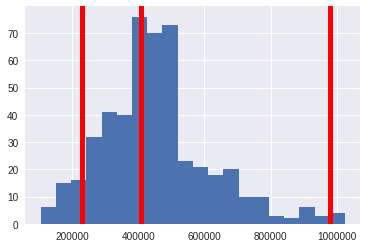

In [18]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 20)
for price in reg.predict(client_data):
    plt.axvline(price, lw = 5, c = 'r')

In [15]:
# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [16]:
print "Stds away from the mean (Client 1): ", (client_prices[0]-mean_price)/std_price
print "Stds away from the mean (Client 2): ", (client_prices[1]-mean_price)/std_price
print "Stds away from the mean (Client 3): ", (client_prices[2]-mean_price)/std_price

Stds away from the mean (Client 1):  -0.2852250532208899
Stds away from the mean (Client 2):  -1.3630889531376638
Stds away from the mean (Client 3):  3.1782615418720654
